In [ ]:
import pandas as pd

# Specify the file path
file_path = r'C:\Bird_Monitoring_Data_GRASSLAND.XLSX'

# Read all sheets into a dictionary of DataFrames
data = pd.read_excel(file_path, sheet_name=None)

# Combine all DataFrames into one
df = pd.concat(data.values(), ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df)


In [67]:
df.AcceptedTSN.tail(40)

8491    178448.0
8492    178448.0
8493    179112.0
8494    179435.0
8495    179112.0
8496    179112.0
8497    179759.0
8498    179759.0
8499    179112.0
8500    179333.0
8501    179112.0
8502    179759.0
8503    179759.0
8504    554138.0
8505    179104.0
8506    179104.0
8507    179680.0
8508    179150.0
8509    179637.0
8510    179150.0
8511    179637.0
8512    179637.0
8513    179637.0
8514    179759.0
8515    179104.0
8516    179150.0
8517    179637.0
8518    179637.0
8519    179637.0
8520    179637.0
8521    179680.0
8522    179680.0
8523    179637.0
8524    179104.0
8525    179637.0
8526    179637.0
8527    179637.0
8528    179637.0
8529    179637.0
8530    179637.0
Name: AcceptedTSN, dtype: float64

In [47]:
print(df.duplicated().sum())  # Counts duplicate rows

1705


In [2]:
df.isnull().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  8531
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs              

In [4]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated

In [ ]:
df.duplicated

In [5]:
df.Distance.isnull().sum()

np.int64(597)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
mode_value = df['Distance'].mode()[0]  # Get the mode (most frequent value) of the 'Distance' column
df['Distance'] = df['Distance'].fillna(mode_value)  # Fill missing values with the mode value

# Output the updated DataFrame
print(df)


In [7]:
df.Distance.isnull().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  6826
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                          0
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      19
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs              

In [9]:
df.AcceptedTSN.isnull().sum()

np.int64(19)

In [ ]:
 import pandas as pd

# Fill NaN values in 'AcceptedTSN' column with the value 997805
df['AcceptedTSN'].fillna(997805, inplace=True)

# Verify the change
print(df)


In [11]:
df.isnull().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  6826
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                          0
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       0
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs              

In [12]:
df.drop('Sub_Unit_Code', axis=1, inplace=True)

In [13]:
df.isnull().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      1
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
TaxonCode                      2
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Previously_Obs                 0
Initial_Three_Min_Cnt          0
dtype: int64

In [93]:
df.dtypes

Admin_Unit_Code                        object
Plot_Name                              object
Location_Type                          object
Year                                   object
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                  object
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                       object
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
TaxonCode                             float64
AOU_Code                               object
PIF_Watchlist_Status                   object
Regional_Stewardship_Status            object
Temperature                       

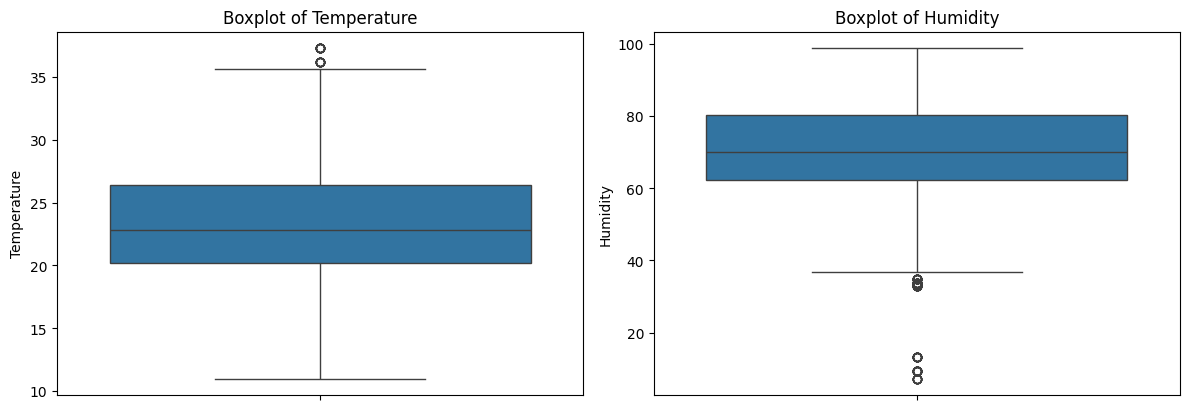

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_columns = ['Temperature', 'Humidity']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Example DataFrame
data = df
df = pd.DataFrame(data)

# Step 1: Create a copy of the original columns to keep intact
df['Temperature_clean'] = df['Temperature']
df['Humidity_clean'] = df['Humidity']

# Step 2: Identifying and removing outliers from 'Temperature_clean' using IQR
Q1_temp = df['Temperature_clean'].quantile(0.25)
Q3_temp = df['Temperature_clean'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_temp = Q1_temp - 1.5 * IQR_temp
upper_temp = Q3_temp + 1.5 * IQR_temp

# Remove outliers in 'Temperature_clean'
df['Temperature_clean'] = df['Temperature_clean'].apply(lambda x: x if lower_temp <= x <= upper_temp else np.nan)

# Step 3: Identifying and removing outliers from 'Humidity_clean' using IQR
Q1_humid = df['Humidity_clean'].quantile(0.25)
Q3_humid = df['Humidity_clean'].quantile(0.75)
IQR_humid = Q3_humid - Q1_humid
lower_humid = Q1_humid - 1.5 * IQR_humid
upper_humid = Q3_humid + 1.5 * IQR_humid

# Remove outliers in 'Humidity_clean'
df['Humidity_clean'] = df['Humidity_clean'].apply(lambda x: x if lower_humid <= x <= upper_humid else np.nan)

# Show the DataFrame with original and cleaned columns
print(df)


<Figure size 1000x600 with 0 Axes>

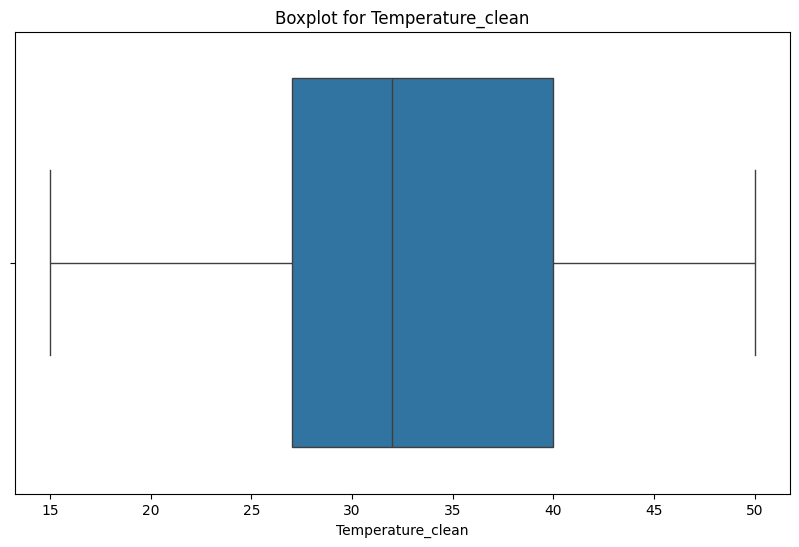

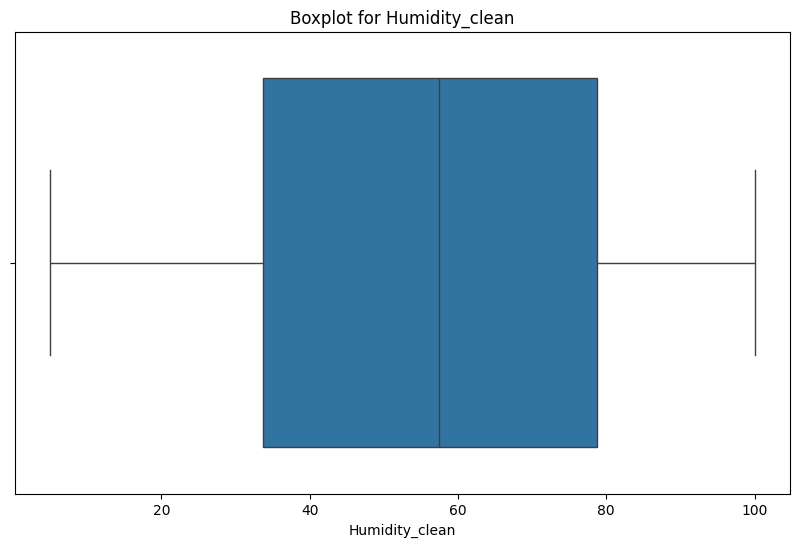

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numeric_columns = [ 'Temperature_clean', 'Humidity_clean']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [16]:
df.columns

Index(['Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
       'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
       'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name',
       'Scientific_Name', 'AcceptedTSN', 'TaxonCode', 'AOU_Code',
       'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature',
       'Humidity', 'Sky', 'Wind', 'Disturbance', 'Previously_Obs',
       'Initial_Three_Min_Cnt', 'Temperature_clean', 'Humidity_clean'],
      dtype='object')

In [17]:
import pandas as pd

# Assuming 'df' is your cleaned DataFrame

# Save the cleaned DataFrame to a new Excel file
df.to_excel('GREENLAND.xlsx', index=False)